In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from qbstyles import mpl_style
from drawdata import ScatterWidget

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

mpl_style()
template = 'plotly_dark'

In [2]:
widget = ScatterWidget()

In [3]:
widget

ScatterWidget()

In [ ]:
df = widget.data_as_pandas

df = df[['x', 'y']]

,x,y,color,label
0,12.245713,15.836138,#1f77b4,a
1,18.847633,-6.148636,#1f77b4,a
2,15.450887,-7.967440,#1f77b4,a
3,-5.031781,22.065338,#1f77b4,a
4,-7.790869,0.765897,#1f77b4,a
...,...,...,...,...
679,391.677966,409.354405,#1f77b4,a
680,378.790042,403.298007,#1f77b4,a
681,406.392184,405.332526,#1f77b4,a
682,376.262854,388.149605,#1f77b4,a


In [64]:
x1 = df['x'].values
x2 = x1 ** 2
y = df['y'].values

X = pd.DataFrame({'x1': x1, 'x2': x2})
y = pd.Series(y, name='y')

data = pd.concat([X, y], axis='columns')

features = X.columns
target = y.name
data.head()

,x1,x2,y
0,12.245713,149.957475,15.836138
1,18.847633,355.233273,-6.148636
2,15.450887,238.729897,-7.967440
3,-5.031781,25.318817,22.065338
4,-7.790869,60.697632,0.765897


In [37]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
y_pred = model.predict(X)
accuracy = r2_score(y, y_pred) * 100

print(f"{accuracy = :.2f}")

accuracy = 98.01


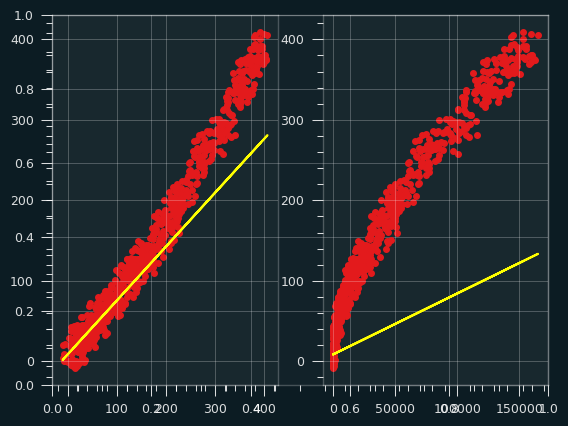

In [43]:
W = model.coef_
b = model.intercept_

line_x1 = x1 * W[0] + b
line_x2 = x2 * W[1] + b

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.scatter(x1, y)
ax1.plot(x1, line_x1, color='yellow')

ax2.scatter(x2, y)
ax2.plot(x2, line_x2, color='yellow')

<Axes: ylabel='y'>

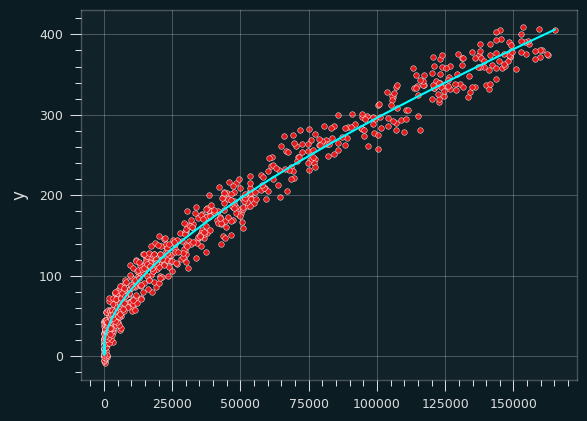

In [47]:
line_x1_x2 = X @ W + b

sns.scatterplot(x=x2, y=y)
sns.lineplot(x=x2, y=line_x1_x2, color='cyan')